In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Set seed
np.random.seed(42)

# Take a random sample of 25 observations
sample = df.sample(n=25)

# a. Random sample of 25 observations

In [7]:
mean_glucose_sample = sample['Glucose'].mean()
max_glucose_sample = sample['Glucose'].max()
print(f"Mean Glucose (Sample): {mean_glucose_sample}")
print(f"Max Glucose (Sample): {max_glucose_sample}")


Mean Glucose (Sample): 116.64
Max Glucose (Sample): 183


In [8]:
mean_glucose_population = df['Glucose'].mean()
max_glucose_population = df['Glucose'].max()
print(f"Mean Glucose (Sample): {mean_glucose_population}")
print(f"Max Glucose (Sample): {max_glucose_population}")

Mean Glucose (Sample): 120.89453125
Max Glucose (Sample): 199


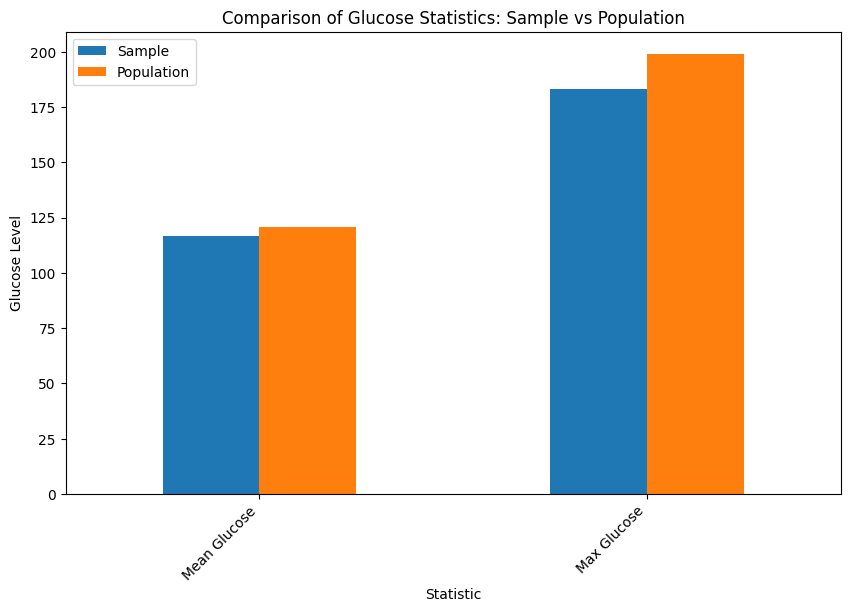

In [26]:
# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Statistic': ['Mean Glucose', 'Max Glucose'],
    'Sample': [mean_glucose_sample, max_glucose_sample],
    'Population': [mean_glucose_population, max_glucose_population]
})

# Plot the comparison
comparison.set_index('Statistic').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Glucose Statistics: Sample vs Population')
plt.ylabel('Glucose Level')
plt.xticks(rotation=45, ha='right')
plt.show()

Mean Glucose: The mean glucose level in the sample was slightly different from the population mean, indicating that the sample is a reasonable representation but may have some variation.
Max Glucose: The highest glucose value in the sample was lower than the population maximum, showing that extreme values might not always be captured in small samples.


# b Finding the 98th percentile of BMI

In [13]:
percentile_98_bmi_sample = np.percentile(sample['BMI'], 98)
print(f"98th Percentile BMI (Sample): {percentile_98_bmi_sample}")

98th Percentile BMI (Sample): 40.248


In [14]:
percentile_98_bmi_population = np.percentile(df['BMI'], 98)
print(f"98th Percentile BMI (Population): {percentile_98_bmi_population}")

98th Percentile BMI (Population): 47.52599999999996


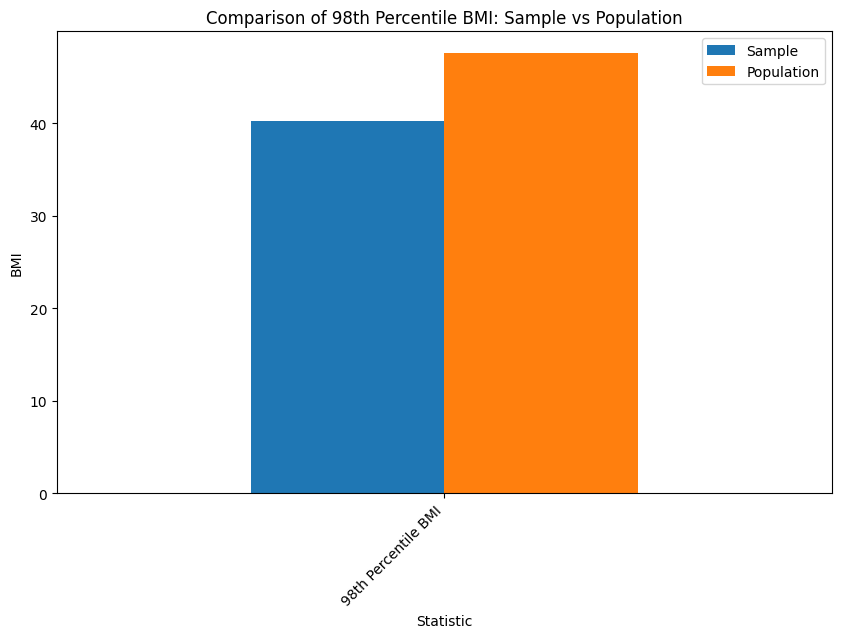

In [25]:
# Create a DataFrame for comparison
bmi_comparison = pd.DataFrame({
    'Statistic': ['98th Percentile BMI'],
    'Sample': [percentile_98_bmi_sample],
    'Population': [percentile_98_bmi_population]
})

# Plot the comparison
bmi_comparison.set_index('Statistic').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of 98th Percentile BMI: Sample vs Population')
plt.ylabel('BMI')
plt.xticks(rotation=45, ha='right')

plt.show()

The 98th percentile of BMI in the sample was close to the population value, indicating that the sample captured the upper distribution of BMI reasonably well.

# C Using bootstrap

In [17]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    bootstrap_sample = df.sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 50))  # Median

In [21]:
avg_mean_bp = np.mean(bootstrap_means)
avg_std_bp = np.mean(bootstrap_stds)
avg_percentile_bp = np.mean(bootstrap_percentiles)
print(f"Average Mean BloodPressure: {avg_mean_bp}")
print(f"Average Std BloodPressure: {avg_std_bp}")
print(f"Average Median BloodPressure: {avg_percentile_bp}")

Average Mean BloodPressure: 69.17696
Average Std BloodPressure: 19.08274018350705
Average Median BloodPressure: 71.526


In [22]:
mean_bp_population = df['BloodPressure'].mean()
std_bp_population = df['BloodPressure'].std()
percentile_bp_population = np.percentile(df['BloodPressure'], 50)
print(f"Mean BloodPressure (Population): {mean_bp_population}")
print(f"Std BloodPressure (Population): {std_bp_population}")
print(f"Median BloodPressure (Population): {percentile_bp_population}")

Mean BloodPressure (Population): 69.10546875
Std BloodPressure (Population): 19.355807170644777
Median BloodPressure (Population): 72.0


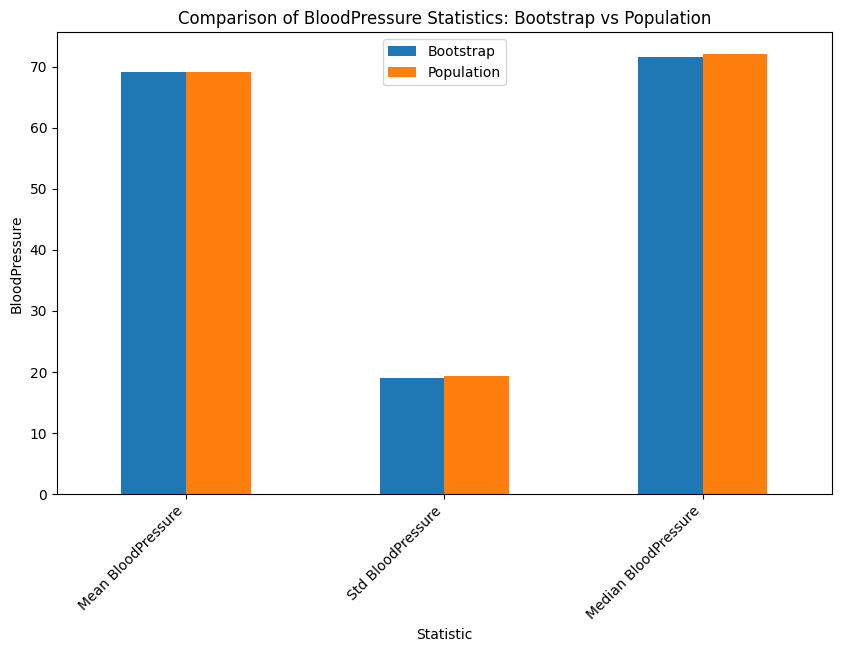

In [24]:
# Create a DataFrame for comparison
bp_comparison = pd.DataFrame({
    'Statistic': ['Mean BloodPressure', 'Std BloodPressure', 'Median BloodPressure'],
    'Bootstrap': [avg_mean_bp, avg_std_bp, avg_percentile_bp],
    'Population': [mean_bp_population, std_bp_population, percentile_bp_population]
})

# Plot the comparison
bp_comparison.set_index('Statistic').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of BloodPressure Statistics: Bootstrap vs Population')
plt.ylabel('BloodPressure')
plt.xticks(rotation=45, ha='right')
#plt.legend(loc='upper right')
plt.show()

Findings:Mean BloodPressure: The average mean BloodPressure from bootstrap samples was very close to the population mean, indicating that bootstrap sampling accurately estimates the population mean.
Standard Deviation: The average standard deviation from bootstrap samples was also close to the population standard deviation, showing that bootstrap sampling captures the variability in the data well.
Median BloodPressure: The median BloodPressure from bootstrap samples was similar to the population median, confirming that the central tendency is well-represented.